In [2]:
# Reading EDF files requires the mne module 
import mne
import matplotlib.pyplot as plt
import numpy as np

The documentation of MNE can be found on [this web site](https://mne.tools) and more precisely [to read EDF files](https://mne.tools/dev/generated/mne.io.read_raw_edf.html). You also look at [this tutorial](https://mne.tools/dev/auto_tutorials/clinical/60_sleep.html#sphx-glr-auto-tutorials-clinical-60-sleep-py)


In the first section, the access to raw data is described. For the machine learning experiments, we will use already prepared files: subsampled, segments of 30s, all in numpy arrays. 


# Reading raw data

The dataset can be downloaded from this [link](https://www.physionet.org/content/sleep-edfx/1.0.0/). There is also a useful description on this page. All the data represents more than 8GB in their raw format. 

## Overview of the dataset
It gathers two datasets: Cassette and Telemetry. 

### Sleep Cassette Study and Data

The 153 `SC*` files (SC = Sleep Cassette) were obtained in a 1987-1991 study of age effects on sleep in healthy Caucasians aged 25-101, without any sleep-related medication. Two PSGs of about 20 hours each were recorded during two subsequent day-night periods at the subjects homes. Subjects continued their normal activities but wore a modified Walkman-like cassette-tape.
Files are named in the form `SC4ssNEO-PSG.edf` where `ss` is the subject number, and `N` is the night. 

### Sleep Telemetry Study and Data

The 44 `ST*` files (ST = Sleep Telemetry) were obtained in a 1994 study of temazepam effects on sleep in 22 Caucasian males and females without other medication. Subjects had mild difficulty falling asleep but were otherwise healthy. The PSGs of about 9 hours were recorded in the hospital during two nights, one of which was after temazepam intake, and the other of which was after placebo intake. Files are named in the form `ST7ssNJ0-PSG.edf` where `ss` is the subject number, and `N` is the night.


## Access to some raw files
If you just want to access to some raw files, the `mne` API allows you to fetch some files by providing a list of subjects like this:

In [3]:
from mne.datasets.sleep_physionet.age import fetch_data

files = fetch_data(subjects=[12], recording=[1])

Using default location ~/mne_data for PHYSIONET_SLEEP...
Creating ~/mne_data


100%|#############################################| 50.8M/50.8M [00:00<?, ?B/s]
100%|#############################################| 4.01k/4.01k [00:00<?, ?B/s]

Download complete in 03m30s (48.5 MB)


## Visualization 

Assume you downloaded some raw data files. 

In [32]:
# Look at Telemetry 
file = "SC4121E0-PSG.edf"
data = mne.io.read_raw_edf(file, preload=True)
raw_data = data.get_data()
print("*** type=", type(raw_data), ", taille = ", raw_data.size, ", dims = ", raw_data.shape)
# You can get the metadata included in the file and a list of all channels:
print("*** info :", data.info)
print("*** channels :", data.ch_names)


Extracting EDF parameters from c:\Users\Justin\Desktop\Justin\adl24-sleep-stage\SC4121E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8357999  =      0.000 ... 83579.990 secs...


C:\Users\Justin\AppData\Local\Temp\ipykernel_31340\2082500935.py:3: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  data = mne.io.read_raw_edf(file, preload=True)
C:\Users\Justin\AppData\Local\Temp\ipykernel_31340\2082500935.py:3: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  data = mne.io.read_raw_edf(file, preload=True)
C:\Users\Justin\AppData\Local\Temp\ipykernel_31340\2082500935.py:3: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  data = mne.io.read_raw_edf(file, preload=True)


*** type= <class 'numpy.ndarray'> , taille =  58506000 , dims =  (7, 8358000)
*** info : <Info | 8 non-empty values
 bads: []
 ch_names: EEG Fpz-Cz, EEG Pz-Oz, EOG horizontal, Resp oro-nasal, EMG ...
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: 1989-05-22 16:02:00 UTC
 nchan: 7
 projs: []
 sfreq: 100.0 Hz
 subject_info: 4 items (dict)
>
*** channels : ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'Resp oro-nasal', 'EMG submental', 'Temp rectal', 'Event marker']


In [33]:
data.info['sfreq']

100.0

Text(0.5, 0, 'temps (h)')

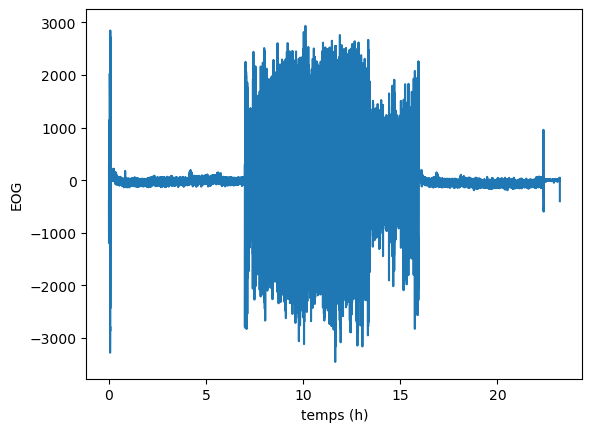

In [34]:
t=data.times
th = t/3600
eog = raw_data[3]
plt.plot(th,eog)
plt.ylabel("EOG")
plt.xlabel("temps (h)")

We can also look at the annotation:

In [35]:
# hypnogramme : on ajoute l'annotation à data
fileh = "SC4121EC-Hypnogram.edf"
annot = mne.read_annotations(fileh)
print(type(annot))
data.set_annotations(annot, emit_warning=True)
print(data.annotations[0]) 

for ann in data.annotations[:20]:
    descr = ann["description"]
    start = ann["onset"]
    end = ann["onset"] + ann["duration"]
    print("'{}' goes from {} to {}".format(descr, start, end))

<class 'mne.annotations.Annotations'>
OrderedDict([('onset', 0.0), ('duration', 28860.0), ('description', 'Sleep stage W'), ('orig_time', datetime.datetime(1989, 5, 22, 16, 2, tzinfo=datetime.timezone.utc))])
'Sleep stage W' goes from 0.0 to 28860.0
'Sleep stage 1' goes from 28860.0 to 28950.0
'Sleep stage 2' goes from 28950.0 to 29400.0
'Sleep stage 1' goes from 29400.0 to 29430.0
'Sleep stage 2' goes from 29430.0 to 30150.0
'Sleep stage 3' goes from 30150.0 to 30330.0
'Sleep stage 4' goes from 30330.0 to 30690.0
'Sleep stage 3' goes from 30690.0 to 30720.0
'Sleep stage 4' goes from 30720.0 to 30750.0
'Sleep stage 3' goes from 30750.0 to 30810.0
'Sleep stage 4' goes from 30810.0 to 31230.0
'Sleep stage 3' goes from 31230.0 to 31290.0
'Sleep stage 2' goes from 31290.0 to 32580.0
'Sleep stage R' goes from 32580.0 to 33390.0
'Sleep stage 1' goes from 33390.0 to 33420.0
'Sleep stage 2' goes from 33420.0 to 33450.0
'Sleep stage 1' goes from 33450.0 to 33480.0
'Sleep stage 2' goes from 3348

C:\Users\Justin\AppData\Local\Temp\ipykernel_31340\1283008779.py:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data.set_annotations(annot, emit_warning=True)


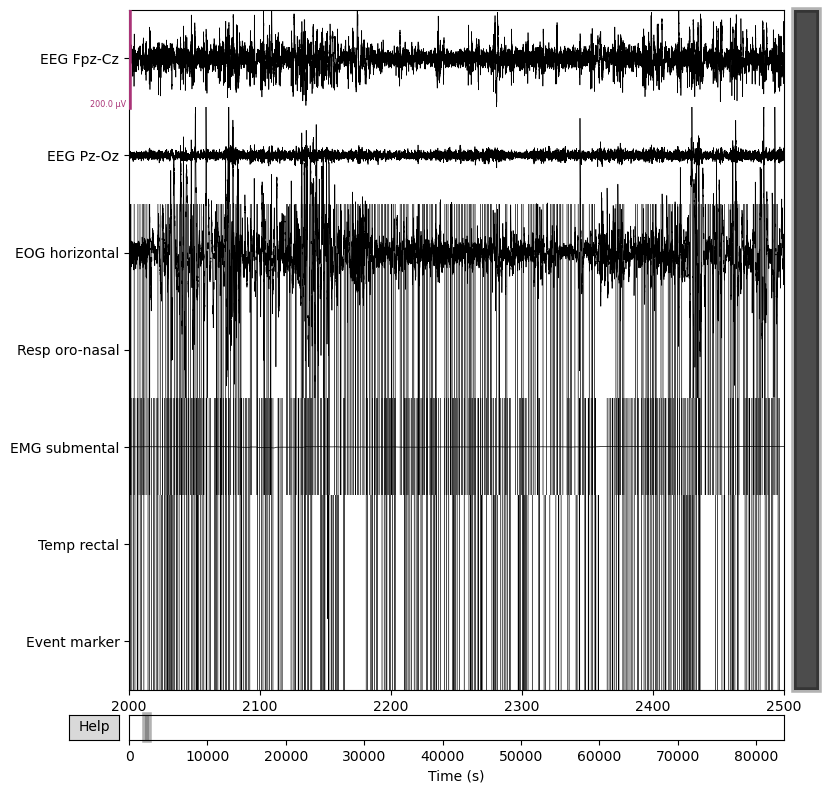

In [49]:
_ = data.plot(
    start=2000,
    duration=500,
    scalings=dict(eeg=1e-4, resp=1e3, eog=1e4, emg=1e4, misc=1e-1),
)

Of course we can do the same for the Cassette study, and we can also directly use `matplotlib`. 

Extracting EDF parameters from c:\Users\Justin\Desktop\Justin\adl24-sleep-stage\SC4121E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8357999  =      0.000 ... 83579.990 secs...


C:\Users\Justin\AppData\Local\Temp\ipykernel_31340\541023904.py:3: RuntimeWarning: Channels contain different highpass filters. Highest filter setting will be stored.
  data = mne.io.read_raw_edf(file, preload=True)
C:\Users\Justin\AppData\Local\Temp\ipykernel_31340\541023904.py:3: RuntimeWarning: Channels contain different lowpass filters. Lowest filter setting will be stored.
  data = mne.io.read_raw_edf(file, preload=True)
C:\Users\Justin\AppData\Local\Temp\ipykernel_31340\541023904.py:3: RuntimeWarning: Highpass cutoff frequency 16.0 is greater than lowpass cutoff frequency 0.7, setting values to 0 and Nyquist.
  data = mne.io.read_raw_edf(file, preload=True)


*** type= <class 'numpy.ndarray'> , taille =  58506000 , dims =  (7, 8358000)
*** info : <Info | 8 non-empty values
 bads: []
 ch_names: EEG Fpz-Cz, EEG Pz-Oz, EOG horizontal, Resp oro-nasal, EMG ...
 chs: 7 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: 1989-05-22 16:02:00 UTC
 nchan: 7
 projs: []
 sfreq: 100.0 Hz
 subject_info: 4 items (dict)
>
*** channels : ['EEG Fpz-Cz', 'EEG Pz-Oz', 'EOG horizontal', 'Resp oro-nasal', 'EMG submental', 'Temp rectal', 'Event marker']


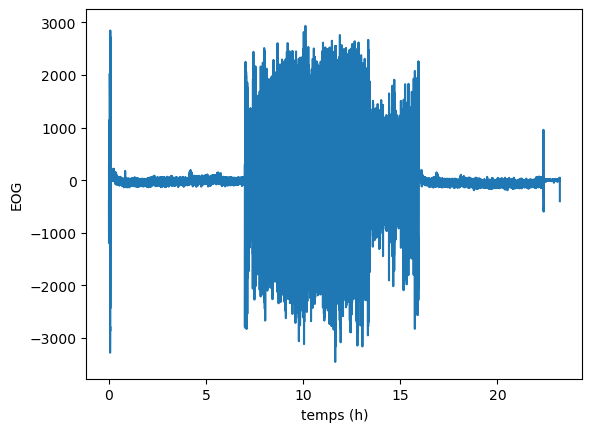

In [58]:
# PSG de cassette 
file = "SC4121E0-PSG.edf"
data = mne.io.read_raw_edf(file, preload=True)
raw_data = data.get_data()
print("*** type=", type(raw_data), ", taille = ", raw_data.size, ", dims = ", raw_data.shape)
# you can get the metadata included in the file and a list of all channels:
print("*** info :", data.info)
print("*** channels :", data.ch_names)
t=data.times
th = t/3600
eog = raw_data[3]
_ = plt.plot(th,eog)
_ = plt.ylabel("EOG")
_ = plt.xlabel("temps (h)")

(7, 8358000)

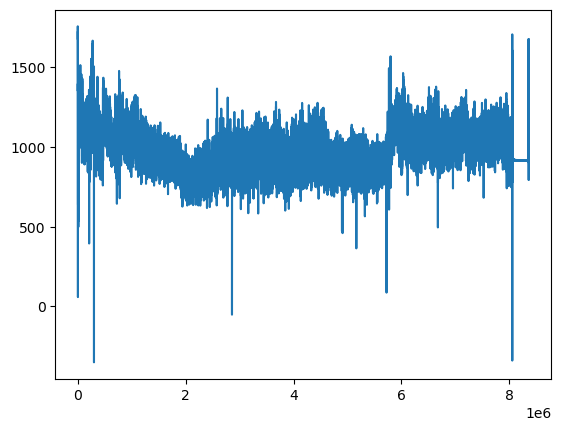

In [69]:
plt.plot(raw_data[6])
np.shape(data.get_data())